In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import datetime

import matplotlib
import matplotlib.pyplot as plt

sys.path.append("../..")

from simstackplots import SimstackPlots
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Step 5.  This is where Figures for the paper are made.

Estimators from the previous step are imported, plotted, and saved.

In [2]:
date_stamp = str(datetime.date.today()).replace('-','')

20220702


In [3]:
pickle_path_suffix =  "cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150"
underscore_suffix = ''
pickle_path = os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities",pickle_path_suffix)
file_path = os.path.join(pickle_path+underscore_suffix, pickle_path_suffix+".pkl")

In [4]:
# Import saved stacking measurement
simstack_object = SimstackToolbox.import_saved_pickles(file_path)

In [5]:
from simstackplots import SimstackPlots
simstack_object = SimstackPlots(simstack_object)

In [6]:
sample_number = 15000
sample_discard = 3000
sample_sigma = 3
sample_speed = ''
sample_prior = '_mixed_prior_qt'
sample_prefix = "{}-{}-{}sigma{}{}".format(sample_number, sample_discard, sample_sigma, sample_speed, sample_prior)
print(sample_prefix)

15000-3000-3sigma_mixed_prior_qt


In [7]:
samples_filename = '_'.join(['mcmc_samples',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,samples_filename)):
    flat_samples_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,samples_filename))
else:
    print(os.path.join(pickle_path,samples_filename), 'not found')

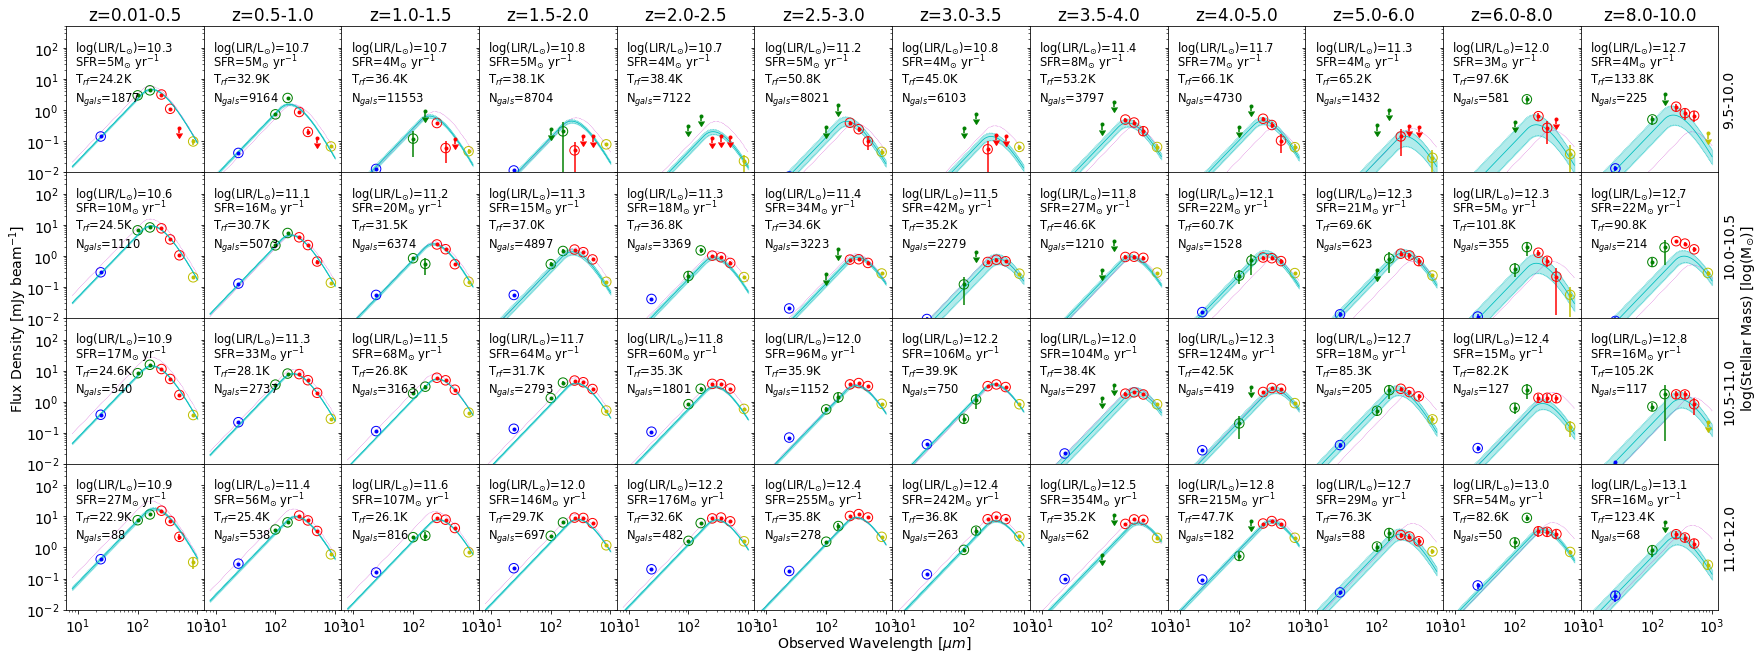

In [8]:
# V2
fig_path = 'C:/Users/viero/Repositories/mnras_viero2022/figures'
fig_filename="SEDs_"+sample_prefix+"_SFG_"+date_stamp+".pdf"
simstack_object.plot_mcmc_seds(flat_samples_dict, show_qt=False, show_A=False, bootstrap_dict=None, errors=('25', '75'),save_path=fig_path,save_filename=fig_filename)

# Import saved LIR dict and Plot Dust Temperature

In [9]:
lir_filename = '_'.join(['lir',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,lir_filename)):
    lir_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,lir_filename))
else:
    print(lir_filename, 'not found')

20.9pm3.5 + 5.9pm1.9 + 0.5pm0.2


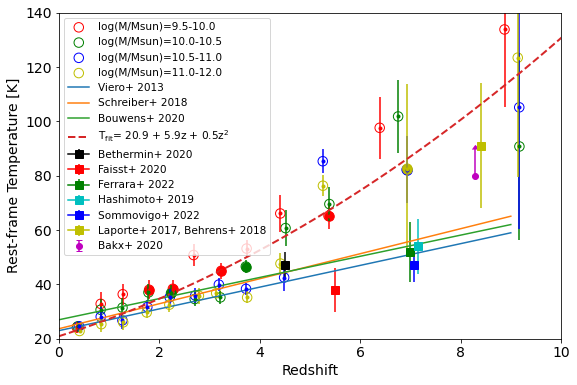

In [14]:
# V2
not_flat_prior = ['redshift_1.5_2.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_2.0_2.5__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_3.0_3.5__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_3.5_4.0__stellar_mass_10.0_10.5__split_params_1',
                  'redshift_5.0_6.0__stellar_mass_9.5_10.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_10.5_11.0__split_params_1',
                  'redshift_6.0_8.0__stellar_mass_11.0_12.0__split_params_1']
interloper_penalty = np.array([[ 0.20394423,  0.06362167,  0.56020644,  0.49302502],
       [ 0.09151786,  0.23032882,  0.0863349 ,  0.19593628],
       [ 0.05893168,  0.22259039,  0.17389162,  0.28317293],
       [ 0.60099453,  0.41476421,  0.25209509,  0.3489658 ],
       [ 0.70073796,  0.77649261,  0.78869021,  0.52671044],
       [ 0.50637284,  0.52443728,  0.70267352,  0.71716112],
       [ 0.36406297,  0.46786263,  0.59174105,  0.70122358],
       [ 0.65241589,  0.55499978,  0.86868223,  1.41120506],
       [ 1.13421777,  1.12633552,  1.40761534,  0.99866342],
       [ 1.07539142,  1.43426816,  1.42707151,  0.5617949 ],
       [ 1.98778612,  4.11723458,  5.95608916, 30.20371038],
       [ 9.17667125, 29.23386011, 39.48129659, 43.74458325]])
fig_path = 'C:/Users/viero/Repositories/mnras_viero2022/figures'
fig_filename="Tdust_"+sample_prefix+"_"+date_stamp+".pdf"
simstack_object.plot_rest_frame_temperature(lir_dict,  xlim=[0, 10], ylim=[2e1, 140], ylog=False, not_flat_prior=not_flat_prior, interloper_penalty=interloper_penalty, print_values=True, save_path=fig_path,save_filename=fig_filename)

# Import saved SFR dict and Plot SFRD

In [11]:
tsfrd_filename =  '_'.join(['total_sfrd',sample_prefix,'dict'])+'.pkl'
if os.path.isfile(os.path.join(pickle_path,tsfrd_filename)):
    total_sfrd_dict = SimstackToolbox.import_saved_pickles(os.path.join(pickle_path,tsfrd_filename))
else:
    print(os.path.join(pickle_path,tsfrd_filename), 'not found')

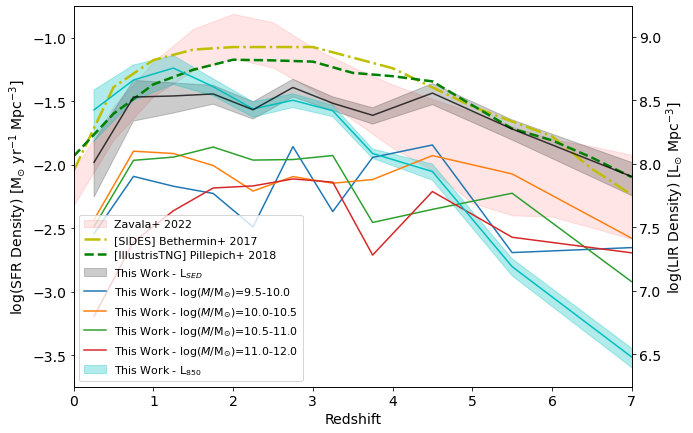

In [12]:
# V2
fig_path = 'C:/Users/viero/Repositories/mnras_viero2022/figures'
fig_filename="SFRD_"+sample_prefix+"_"+date_stamp+".pdf"
simstack_object.plot_total_sfrd(total_sfrd_dict, xlim=[0,7], save_path=fig_path, save_filename=fig_filename)